In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [ ]:
# # How many images in each folder?
# import os

# # Walk through 10 percent data directory and list number of files
# for dirpath, dirnames, filenames in os.walk("data"):
#   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# import os
# import random
# import shutil

# def split_data(source_dir, train_dir, test_dir, split_ratio=0.8, seed=42):
#     random.seed(seed)  # Set the random seed for reproducibility
#     if not os.path.exists(train_dir):
#         os.makedirs(train_dir)
#     if not os.path.exists(test_dir):
#         os.makedirs(test_dir)

#     for category in os.listdir(source_dir):
#         category_path = os.path.join(source_dir, category)
#         if os.path.isdir(category_path):
#             images = os.listdir(category_path)
#             random.shuffle(images)

#             train_size = int(len(images) * split_ratio)
#             train_images = images[:train_size]
#             test_images = images[train_size:]

#             category_train_dir = os.path.join(train_dir, category)
#             category_test_dir = os.path.join(test_dir, category)

#             if not os.path.exists(category_train_dir):
#                 os.makedirs(category_train_dir)
#             if not os.path.exists(category_test_dir):
#                 os.makedirs(category_test_dir)

#             for image in train_images:
#                 shutil.copy(os.path.join(category_path, image), category_train_dir)

#             for image in test_images:
#                 shutil.copy(os.path.join(category_path, image), category_test_dir)


# source_directory = 'data'
# train_directory = 'data_split/train'
# test_directory = 'data_split/test'


# split_data(source_directory, train_directory, test_directory)


In [3]:
import os
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/cars_dataset/data_split"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/cars_dataset/data_split'.
There are 5 directories and 0 images in '/content/drive/MyDrive/cars_dataset/data_split/train'.
There are 0 directories and 64 images in '/content/drive/MyDrive/cars_dataset/data_split/train/Audi cars'.
There are 0 directories and 64 images in '/content/drive/MyDrive/cars_dataset/data_split/train/honda cars'.
There are 0 directories and 64 images in '/content/drive/MyDrive/cars_dataset/data_split/train/suzuki cars'.
There are 0 directories and 64 images in '/content/drive/MyDrive/cars_dataset/data_split/train/mercedes cars'.
There are 0 directories and 64 images in '/content/drive/MyDrive/cars_dataset/data_split/train/mahindra cars'.
There are 5 directories and 0 images in '/content/drive/MyDrive/cars_dataset/data_split/test'.
There are 0 directories and 16 images in '/content/drive/MyDrive/cars_dataset/data_split/test/mahindra cars'.
There are 0 directories and 16 images in '/content/drive/MyDriv

In [4]:
from PIL import Image
import os

def convert_to_rgba(image_path):
    with Image.open(image_path) as img:
        if img.mode == 'P':  # Check if the image is in palette mode
            img = img.convert('RGBA')
        img.save(image_path)  # Save the converted image back to the same path

# Apply this conversion to all images in your dataset directories
for dirpath, dirnames, filenames in os.walk("data_split"):
    for filename in filenames:
        if filename.endswith(".png"):  # Adjust the condition for other formats if needed
            convert_to_rgba(os.path.join(dirpath, filename))


In [5]:
from keras.applications.vgg16 import VGG16

In [6]:
IMAGE_SIZE = [224, 224]
VGG=VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3],
)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
for layer in VGG.layers:
    layer.trainable = False

In [8]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from glob import glob
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cars_dataset/data_split/train/*')

In [ ]:
# from tensorflow.keras.layers import Input, Dense, Flatten
# from tensorflow.keras.models import Model
# # our layers - you can add more if you want
# x = Flatten()(model.output)
# prediction = Dense(len(folders), activation='softmax')(x)
# # create a model object
# model = Model(inputs=model.input, outputs=prediction)

In [10]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    VGG, # use the feature extraction layer as the base
    layers.Flatten(),
    layers.Dense(len(folders), activation='softmax', name='output_layer') # create our own output layer
  ])

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224, 224) # define image size
train_dir = "/content/drive/MyDrive/cars_dataset/data_split/train/"
test_dir = "/content/drive/MyDrive/cars_dataset/data_split/test/"

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=32,
                                               class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=32,
                                              class_mode="categorical")

Training images:
Found 318 images belonging to 5 classes.
Testing images:
Found 81 images belonging to 5 classes.


In [13]:
train_data.class_indices

{'Audi cars': 0,
 'honda cars': 1,
 'mahindra cars': 2,
 'mercedes cars': 3,
 'suzuki cars': 4}

In [14]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [15]:
# Setup checkpoint path
checkpoint_path = "model_weights/checkpoint.weights.h5" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
# # Assume train_data is your data generator or dataset

# # Fetch a batch of data
# for batch in train_data.next():
#     images, labels = batch
#     print(f"Labels shape: {labels.shape}")
#     print(f"Labels sample: {labels[:5]}")
#     break


In [16]:
History = model.fit(
  train_data,
  validation_data=test_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data),
  callbacks=[create_tensorboard_callback("transfer_learning3", "cars_classification"),checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning3/cars_classification/20240525-045140
Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 1.7282 - accuracy: 0.2107 
Epoch 1: val_loss improved from inf to 1.55496, saving model to model_weights/checkpoint.weights.h5
10/10 [==============================] - 262s 25s/step - loss: 1.7282 - accuracy: 0.2107 - val_loss: 1.5550 - val_accuracy: 0.3210
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 1.4520 - accuracy: 0.3585 
Epoch 2: val_loss improved from 1.55496 to 1.42345, saving model to model_weights/checkpoint.weights.h5
10/10 [==============================] - 273s 28s/step - loss: 1.4520 - accuracy: 0.3585 - val_loss: 1.4235 - val_accuracy: 0.3827
Epoch 3/5
10/10 [==============================] - ETA: 0s - loss: 1.2883 - accuracy: 0.4528 
Epoch 3: val_loss improved from 1.42345 to 1.30682, saving model to model_weights/checkpoint.weights.h5
10/10 [==============================] - 267s 27s/step - los

In [17]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

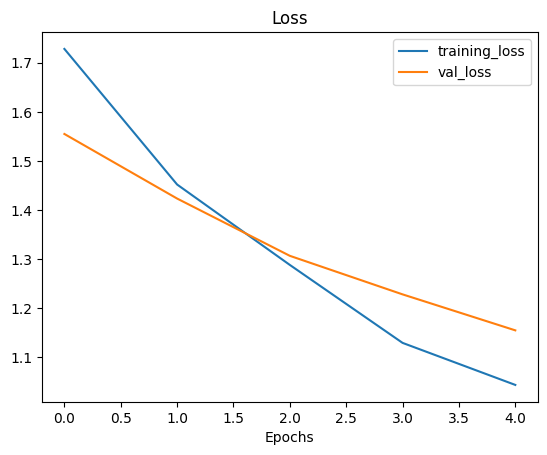

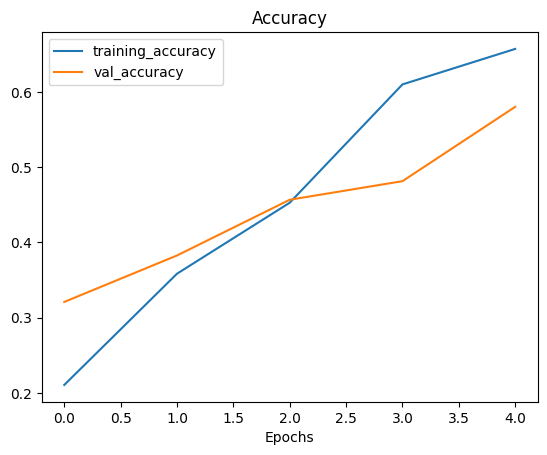

In [18]:
plot_loss_curves(History)

In [19]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(VGG.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [20]:
# Make all the layers in model_2_base_model trainable
VGG.trainable = True

# Freeze all layers except for the last 10
for layer in VGG.layers[:-9]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [21]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(VGG.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = 13

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune = model.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=History.epoch[-1], # start from previous last epoch
                                               validation_steps=len(test_data),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "car_fine_tune_last_9")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/car_fine_tune_last_9/20240525-051807
Epoch 5/13
10/10 [==============================] - 430s 43s/step - loss: 1.2214 - accuracy: 0.5283 - val_loss: 1.2000 - val_accuracy: 0.5556
Epoch 6/13
10/10 [==============================] - 416s 42s/step - loss: 0.7678 - accuracy: 0.7107 - val_loss: 1.1296 - val_accuracy: 0.5679
Epoch 7/13
10/10 [==============================] - 383s 38s/step - loss: 0.5110 - accuracy: 0.7956 - val_loss: 0.6634 - val_accuracy: 0.7778
Epoch 8/13
10/10 [==============================] - 418s 42s/step - loss: 0.2255 - accuracy: 0.9277 - val_loss: 0.6528 - val_accuracy: 0.8025
Epoch 9/13
10/10 [==============================] - 419s 42s/step - loss: 0.1942 - accuracy: 0.9434 - val_loss: 0.5958 - val_accuracy: 0.7778
Epoch 10/13
10/10 [==============================] - 418s 43s/step - loss: 0.0994 - accuracy: 0.9654 - val_loss: 0.5835 - val_accuracy: 0.7531
Epoch 11/13
10/10 [==============================] - 417s 4

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.219321146607399, 0.4203655421733856, 0.5561357736587524, 0.642297625541687, 0.7284595370292664, 0.4595300257205963, 0.767624020576477, 0.8302872180938721, 0.8929504156112671, 0.9634464979171753, 0.9608355164527893]


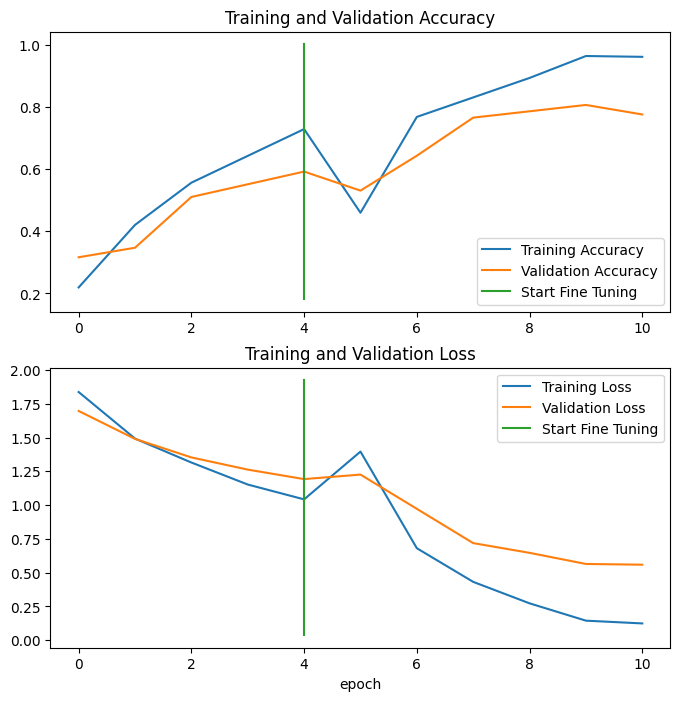

In [ ]:
compare_historys(original_history=History,
                 new_history=history_fine_tune,
                 initial_epochs=5)

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('vGG_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
img=image.load_img('/content/drive/MyDrive/cars_dataset/data_split/test/honda cars/Image_21.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255.
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
# Get class indices from train_data
class_indices = train_data.class_indices

# Reverse the class_indices dictionary to map indices to labels
index_to_label = {v: k for k, v in class_indices.items()}

# Get the predicted class indices
a = np.argmax(model.predict(img_data), axis=1)
print(a)
# Map the predicted class indices to class labels
predicted_labels = [index_to_label[i] for i in a]

# Print the predicted labels
print(predicted_labels)

1/1 [==============================] - 0s 28ms/step
[2]
['honda cars']


In [ ]:
print(train_data.class_indices)

{'Audi cars': 0, 'Lamborghini cars': 1, 'honda cars': 2, 'mahindra cars': 3, 'mercedes cars': 4, 'suzuki cars': 5}


In [ ]:
# Get class indices from train_data
class_indices = train_data.class_indices

# Reverse the class_indices dictionary to map indices to labels
index_to_label = {v: k for k, v in class_indices.items()}

# Get the predicted class indices
a = np.argmax(model.predict(img_data), axis=1)

# Map the predicted class indices to class labels
predicted_labels = [index_to_label[i] for i in a]

# Print the predicted labels
print(predicted_labels)

1/1 [==============================] - 0s 18ms/step
['honda cars']
